In [1]:
## Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Cargar el dataset MovieLens 100K
# u.data → user_id, item_id, rating, timestamp
ratings = pd.read_csv("datasets/ml-100k/u.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

# u.item → item_id, title, genres...
movies = pd.read_csv("datasets/ml-100k/u.item", sep="|", encoding="latin-1", header=None, usecols=[0, 1], names=["item_id", "title"])

ratings = ratings.merge(movies, on="item_id")
ratings = ratings.drop(columns=["timestamp"])
ratings.head(10)

,user_id,item_id,rating,title
0,196,242,3,Kolya (1996)
1,186,302,3,L.A. Confidential (1997)
2,22,377,1,Heavyweights (1994)
3,244,51,2,Legends of the Fall (1994)
4,166,346,1,Jackie Brown (1997)
5,298,474,4,Dr. Strangelove or: How I Learned to Stop Worr...
6,115,265,2,"Hunt for Red October, The (1990)"
7,253,465,5,"Jungle Book, The (1994)"
8,305,451,3,Grease (1978)
9,6,86,3,"Remains of the Day, The (1993)"


In [3]:
## Análisis exploratorio de datos
n_users = ratings['user_id'].nunique()
n_items = ratings['item_id'].nunique()
n_ratings = len(ratings)

print(f"Número de usuarios: {n_users}")
print(f"Número de películas: {n_items}")
print(f"Número total de ratings: {n_ratings}")

# Sparsity (porcentaje de datos faltantes)
total_possible = n_users * n_items
sparsity = 1 - n_ratings / total_possible
print(f"Sparsity del dataset: {sparsity:.2%}")

Número de usuarios: 943
Número de películas: 1682
Número total de ratings: 100000
Sparsity del dataset: 93.70%


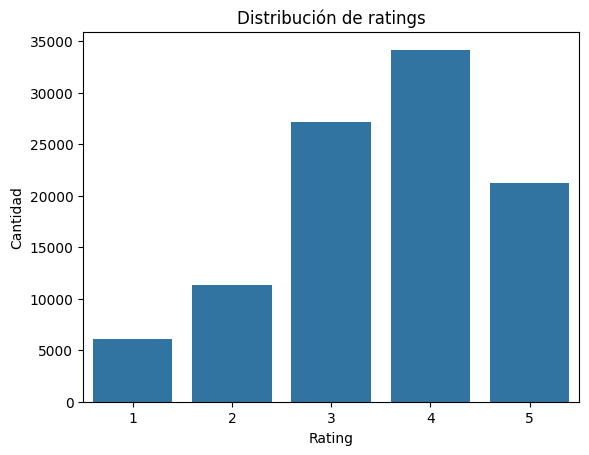

In [4]:
## Distribución de ratings
sns.countplot(x="rating", data=ratings)
plt.title("Distribución de ratings")
plt.xlabel("Rating")
plt.ylabel("Cantidad")
plt.show()

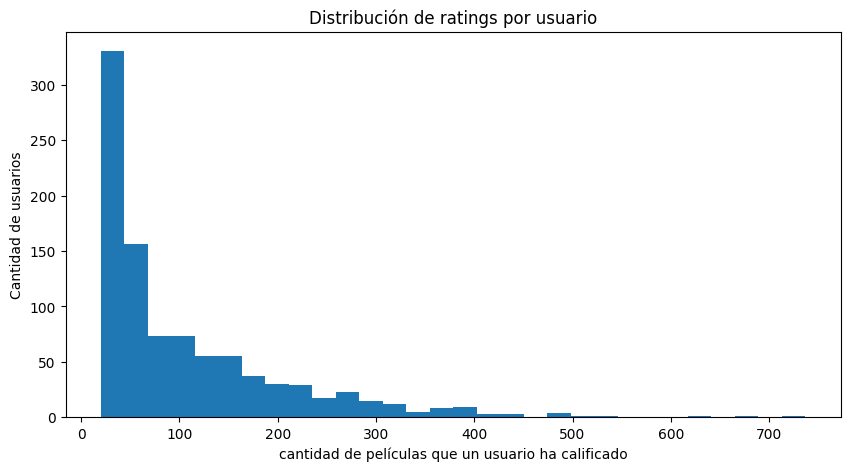

In [5]:
## Ratings por usuario
ratings_per_user = ratings['user_id'].value_counts()  # Cuenta valores únicos de user_id, es decir, cantidad de veces que rateo

plt.figure(figsize=(10,5))
plt.hist(ratings_per_user, bins=30)
plt.title("Distribución de ratings por usuario")
plt.xlabel("cantidad de películas que un usuario ha calificado")
plt.ylabel("Cantidad de usuarios")
plt.show()

# La primera barra, muy alta, indica que hay más de 300 usuarios que calificaron entre 1 y 30 películas.

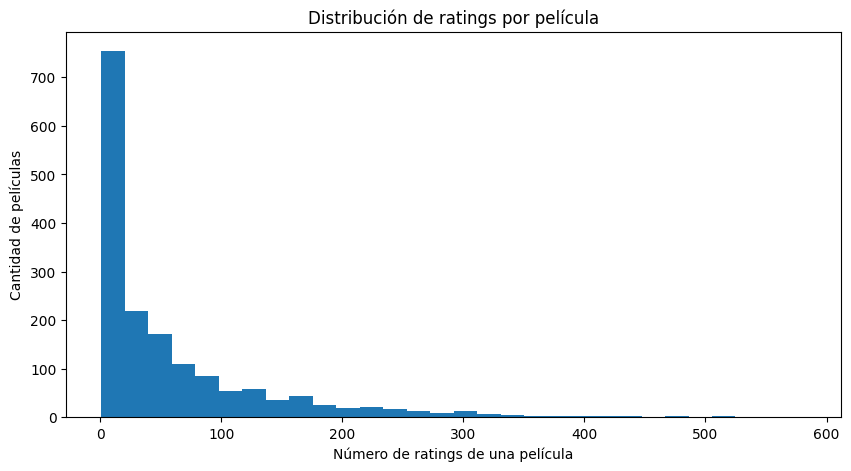

In [6]:
## Ratings por película
ratings_per_movie = ratings['item_id'].value_counts() # Cantidad de apariciones de cada película

plt.figure(figsize=(10,5))
plt.hist(ratings_per_movie, bins=30)
plt.title("Distribución de ratings por película")
plt.xlabel("Número de ratings de una película") # Por ej, una pelicula se calificó 10 veces
plt.ylabel("Cantidad de películas")             # Hay 700 películas que se calificaron 30 veces
plt.show()

# La primera barra, muy alta, indica que hay más de 700 películas que recibieron entre 1 y 30 ratings.

### **Conclusiones** 
**Número de usuarios y películas**
* 943 usuarios y 1682 películas.
* Matriz usuario-película de 943 x 1682 = 1.586.426 posibles interacciones.

**Sparcity (Dispersión de datos)**
* Solo hay 100.000 ratings reales, lo que implica una sparsity de ~93.7%. Esto significa que la gran mayoría de las combinaciones usuario-película están vacías (no calificadas).
* **Implicación:** los modelos deben funcionar bien con pocos datos por usuario, esto hace que modelos como filtrado colaborativo necesiten trucos para ser efectivos (kNN, regularización, etc.).

**Distribución de ratings**
* Los valores más comunes son 4 y 5 estrellas. 
* Hay muy pocos 1s y 2s. 
* **Implicación:** 
    * Los usuarios suelen dar calificaciones positivas. 
    * Hay sesgo positivo, lo que puede influir en métricas como RMSE. 
    * Los modelos pueden tender a sobrevalorar ítems si no se ajusta esto.

**Distribución de ratings por usuario**
* La mayoría de los usuarios calificó menos de 50 películas.
* Muy pocos calificaron más de 300.
* **Implicación:**
    * Hay muchos usuarios con muy poca información.
    * Es un desafío para el filtrado colaborativo → aparece el problema del usuario frío.
    * Reforza la idea de usar modelos híbridos, contexto, o perfiles generados.

**Distribución de ratings por película**
* Muchas películas tienen muy pocos ratings (1 a 10).
* Pocas películas fueron calificadas por muchos usuarios (algunas más de 300).
* **Implicación:**
    * Existe un claro sesgo de popularidad: los modelos tenderán a recomendar lo más calificado.
    * Las películas menos vistas pueden no ser recomendadas nunca, lo que perjudica la diversidad.


**Síntesis de Aprendizajes Clave**

| Área       | Conclusión                                                    | Conecta con tema de tesis                    |
|------------|---------------------------------------------------------------|----------------------------------------------|
| Datos      | Dataset realista, pero muy disperso (sparsity ~94%)           | Requiere técnicas para sparsity              |
| Usuarios   | Mucha variabilidad en la actividad entre usuarios             | Usuario frío, personalización                |
| Ítems      | Alta concentración de ratings en pocos ítems (larga cola)     | Sesgo de popularidad                         |
| Ratings    | Sesgo positivo (mayoría de ratings son 4 o 5)                 | Necesidad de normalización, calibrado        |
| Evaluación | Las métricas promedio pueden ser engañosas                    | Considerar diversidad y cobertura también    |


